# Simulación de ecuaciones diferenciales

El objetivo de este primer tutorial, es entender como se puede simular la respuesta en el tiempo de un sistema representado en ecuaciones diferenciales. Para enteder lo anterior se procede a realizar la simulacion de un sistema masa-resorte-amortiguador dada por la siguiente ecuaciones diferencial
$$
m\frac{d^2x}{dt^2} + b\frac{dx}{dt} + kx = f(t),
$$
en donde $m$ es la masa, $b$ es la constante del amortiguador, $k$ la constante del resorte, y $f$ la fuerza de entrada.

El primer paso es importar la libreria de control.


In [2]:
import control as ct

La libreria de sistemas de control de python, es un paquete que implementa las operaciones basicas para el analisis y diseno de sistemas de control realimentado.

Caracteristicas:
- Respuesta en tiempo y frecuencia de sistemas lineales.
- Modelacion, simulacion y analisis de sistemas no lineales.
- Algebra de diagramas de bloques.
- Respuesta en el tiempo ante escalones e impulso.
- Graficas de Bode y Nyquist 
- Compatibilidad con Matlab

Con esto en mente comenzemos armar la solucion. Primero creamos los parametros o constantes del modelo

In [3]:
# Parameters
m = 250.0           # system mass
k = 40.0            # spring constant
b = 60.0            # damping constant

Para poder simular cualquier ecuacion diferencial de orden dos o superior, se debe transformar el sistema en ecuaciones diferenciales de primer orden, este procedimiento se conoce como convertir en el sistema en espacio de estado. Para lo anterior, lo mas facil es seleccionar las variables de menor derivada como las variables de estado de la siguiente forma

$$
x_1 = x \
$$
$$
x_2 = \dot{x}
$$


Teniendo en cuenta estos cambios de variables, se procede a encontrar las derivadas de cada uno. Al final se debe encontrar expresiones que solo contengan las variables de estado. Con lo anterior se tiene que 

$$
\dot{x}_1 = x_2
$$
$$
\dot{x}_2 = \frac{1}{m}\left[u(t) - k x_1 - b x_2\right]
$$
$$
y = x_1
$$

Teniendo en cuentas estas expresiones, se puede convertir el sistema en matrices, la representacion matricial esta dada por

$$
\begin{align*}
\dot{x} = A x + B u
\end{align*}
$$
$$
y = Cx + Du
$$

donde

$$
\begin{align*}
x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}, \quad
\dot{x} = \begin{bmatrix} \dot{x}_1 \\ \dot{x}_2 \end{bmatrix}, \quad
A = \begin{bmatrix} 0 & 1 \\ -k/m & -b/m \end{bmatrix}, \quad
B = \begin{bmatrix} 0 \\ 1/m \end{bmatrix}
\end{align*}
$$
$$
\begin{align*}
C = \begin{bmatrix} 1 & 0 \end{bmatrix}, \quad
D = 0
\end{align*}
$$




In [7]:
# System matrices
A = [[0, 1.], [-k/m, -b/m]]
B = [[0], [1/m]]
C = [[1., 0]]
sys = ct.ss(A, B, C, 0)
sys

<LinearIOSystem:sys[5]:['u[0]']->['y[0]']>

Ahora miremos la simulacion en el tiempo ante un escalon unitario

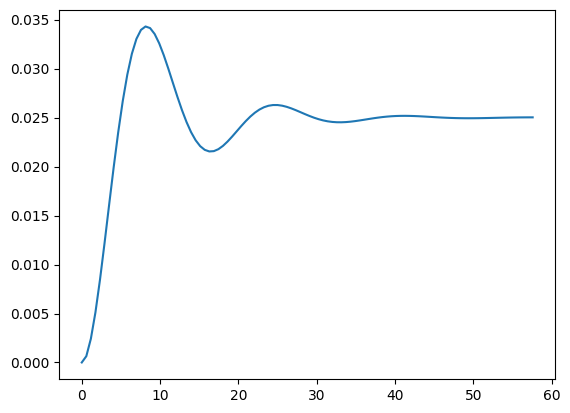

In [13]:
import matplotlib.pyplot as plt

# Step response for the system
plt.figure(1)
T, output = ct.step_response(sys)
plt.plot(T, output)
plt.show(block=False)

Simulemos por mas tiempo el sistema

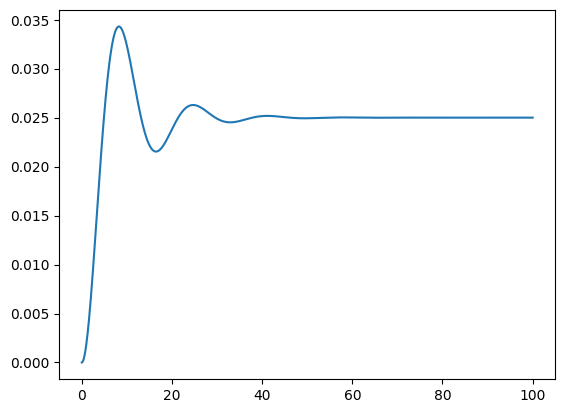

In [20]:
import numpy as np

# Time vector
t = np.linspace(0, 100, 1000)

# Step response
t, y = ct.step_response(sys, t)

# Step response for the system
plt.figure(1)
plt.plot(t, y)
plt.show(block=False)

Ahora un escalon con amplitud diferente de uno

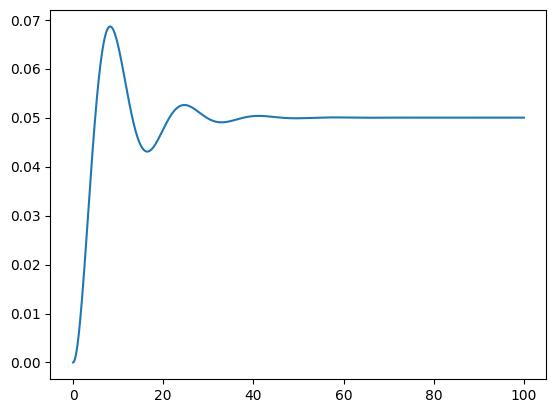

In [23]:
# Time vector
t = np.linspace(0, 100, 1000)
input = 2*np.ones(t.shape)

# Step response
t, y = ct.forced_response(
    sys = sys, 
    T = t,
    U = input
    )

# Step response for the system
plt.figure(1)
plt.plot(t, y)
plt.show(block=False)

## Laboratorio

Hacer la simulacion en el tiempo de los sistemas:
- Sistema de tanques
- Circuito RLC

Analizar como hacer para simular un sistema no lineal
- Utilizar control.NonlinearIOSystem
